In [1]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.optim as optim
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



In [2]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(100, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, 784)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x),0.2)
        x = F.leaky_relu(self.fc2(x),0.2)
        x = F.leaky_relu(self.fc3(x),0.2)
        x = F.tanh(self.fc4(x))
        return x

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 1)

    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.dropout(x,0.3)
        x = F.leaky_relu(self.fc2(x))
        x = F.dropout(x,0.3)
        x = F.leaky_relu(self.fc3(x))
        x = F.dropout(x,0.3)
        x = F.sigmoid(self.fc4(x))
        return x



In [3]:
# training parameters
batch_size = 128
lr = 0.0002
train_epoch = 100

# data_loader
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)

In [4]:
G = Generator()
D = Discriminator()

# Binary Cross Entropy loss
BCE_loss = nn.BCELoss()

# Adam optimizer
G_optimizer = optim.Adam(G.parameters(), lr=lr)
D_optimizer = optim.Adam(D.parameters(), lr=lr)

zz = Variable(torch.rand((100,100)))


/home/tetiana/.local/lib/python3.5/site-packages/torch/nn/functional.py:1189: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


epoch: 0, batch: 57
epoch: 0, batch: 115
epoch: 0, batch: 173
epoch: 0, batch: 231
epoch: 0, batch: 289
epoch: 0, batch: 347
epoch: 0, batch: 405
epoch: 0, batch: 463


/home/tetiana/.local/lib/python3.5/site-packages/torch/nn/functional.py:1189: UserWarning: Using a target size (torch.Size([96])) that is different to the input size (torch.Size([96, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


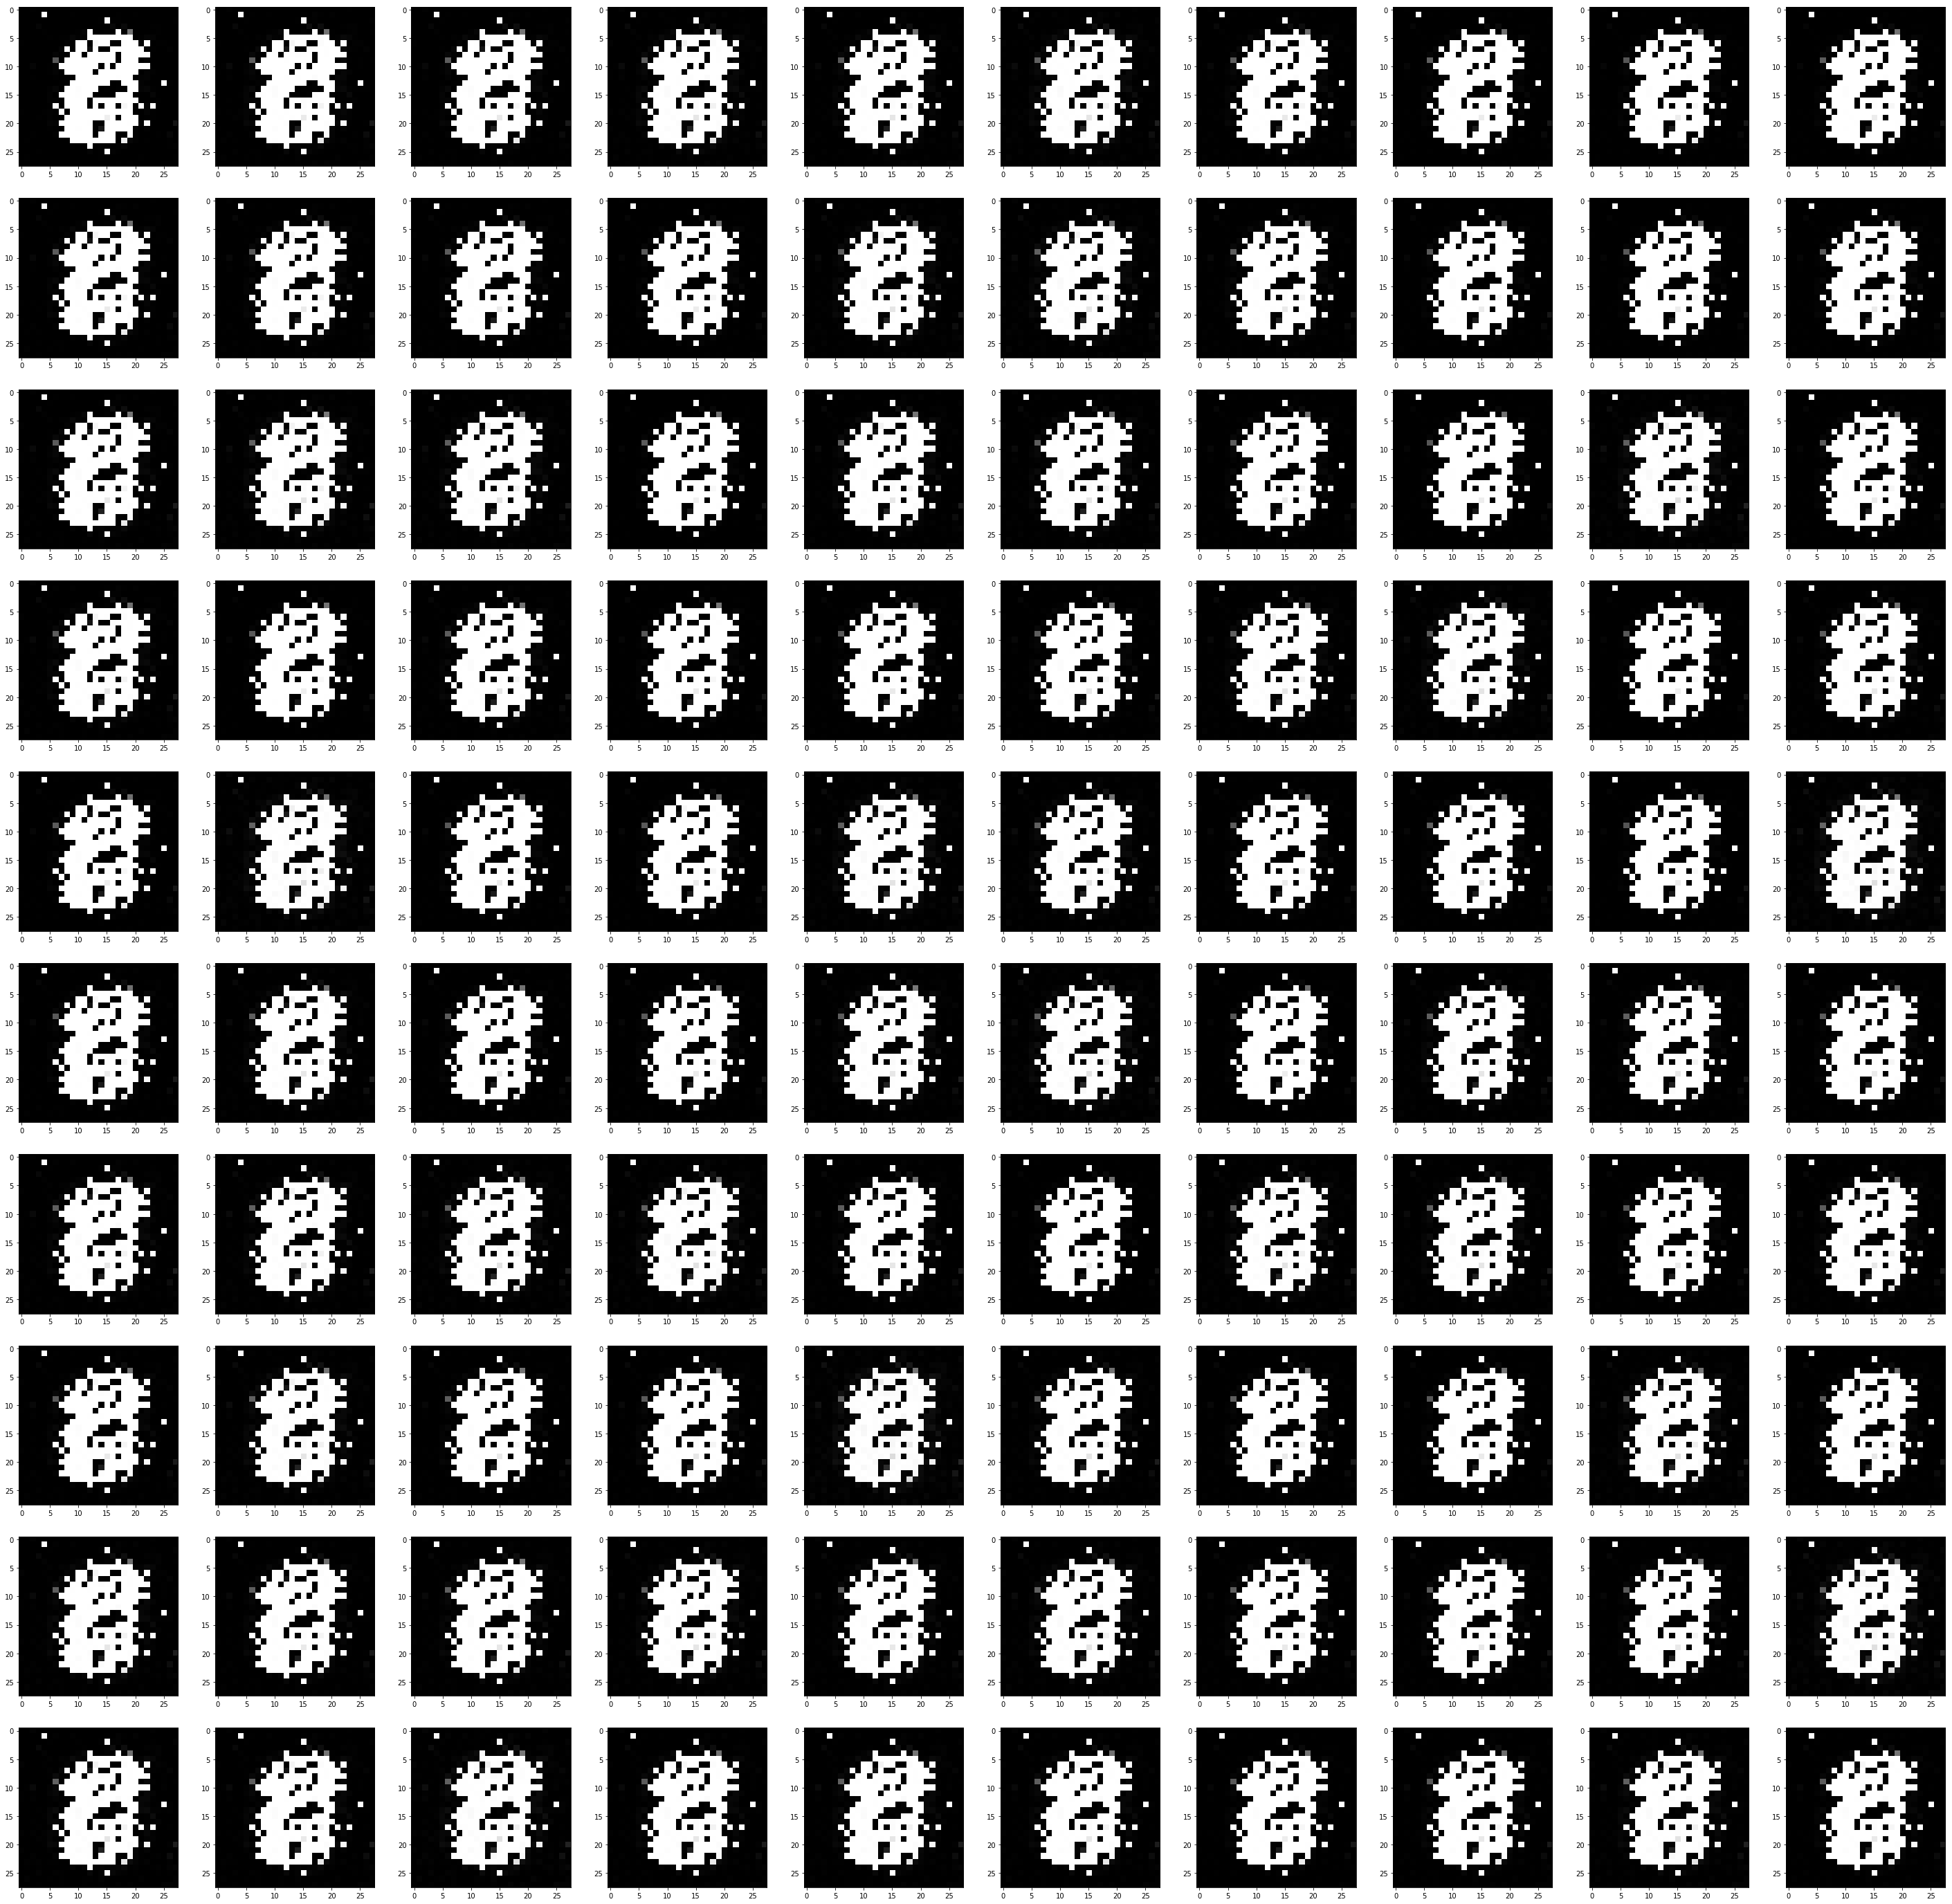

epoch: 1, batch: 57
epoch: 1, batch: 115
epoch: 1, batch: 173
epoch: 1, batch: 231
epoch: 1, batch: 289
epoch: 1, batch: 347
epoch: 1, batch: 405
epoch: 1, batch: 463


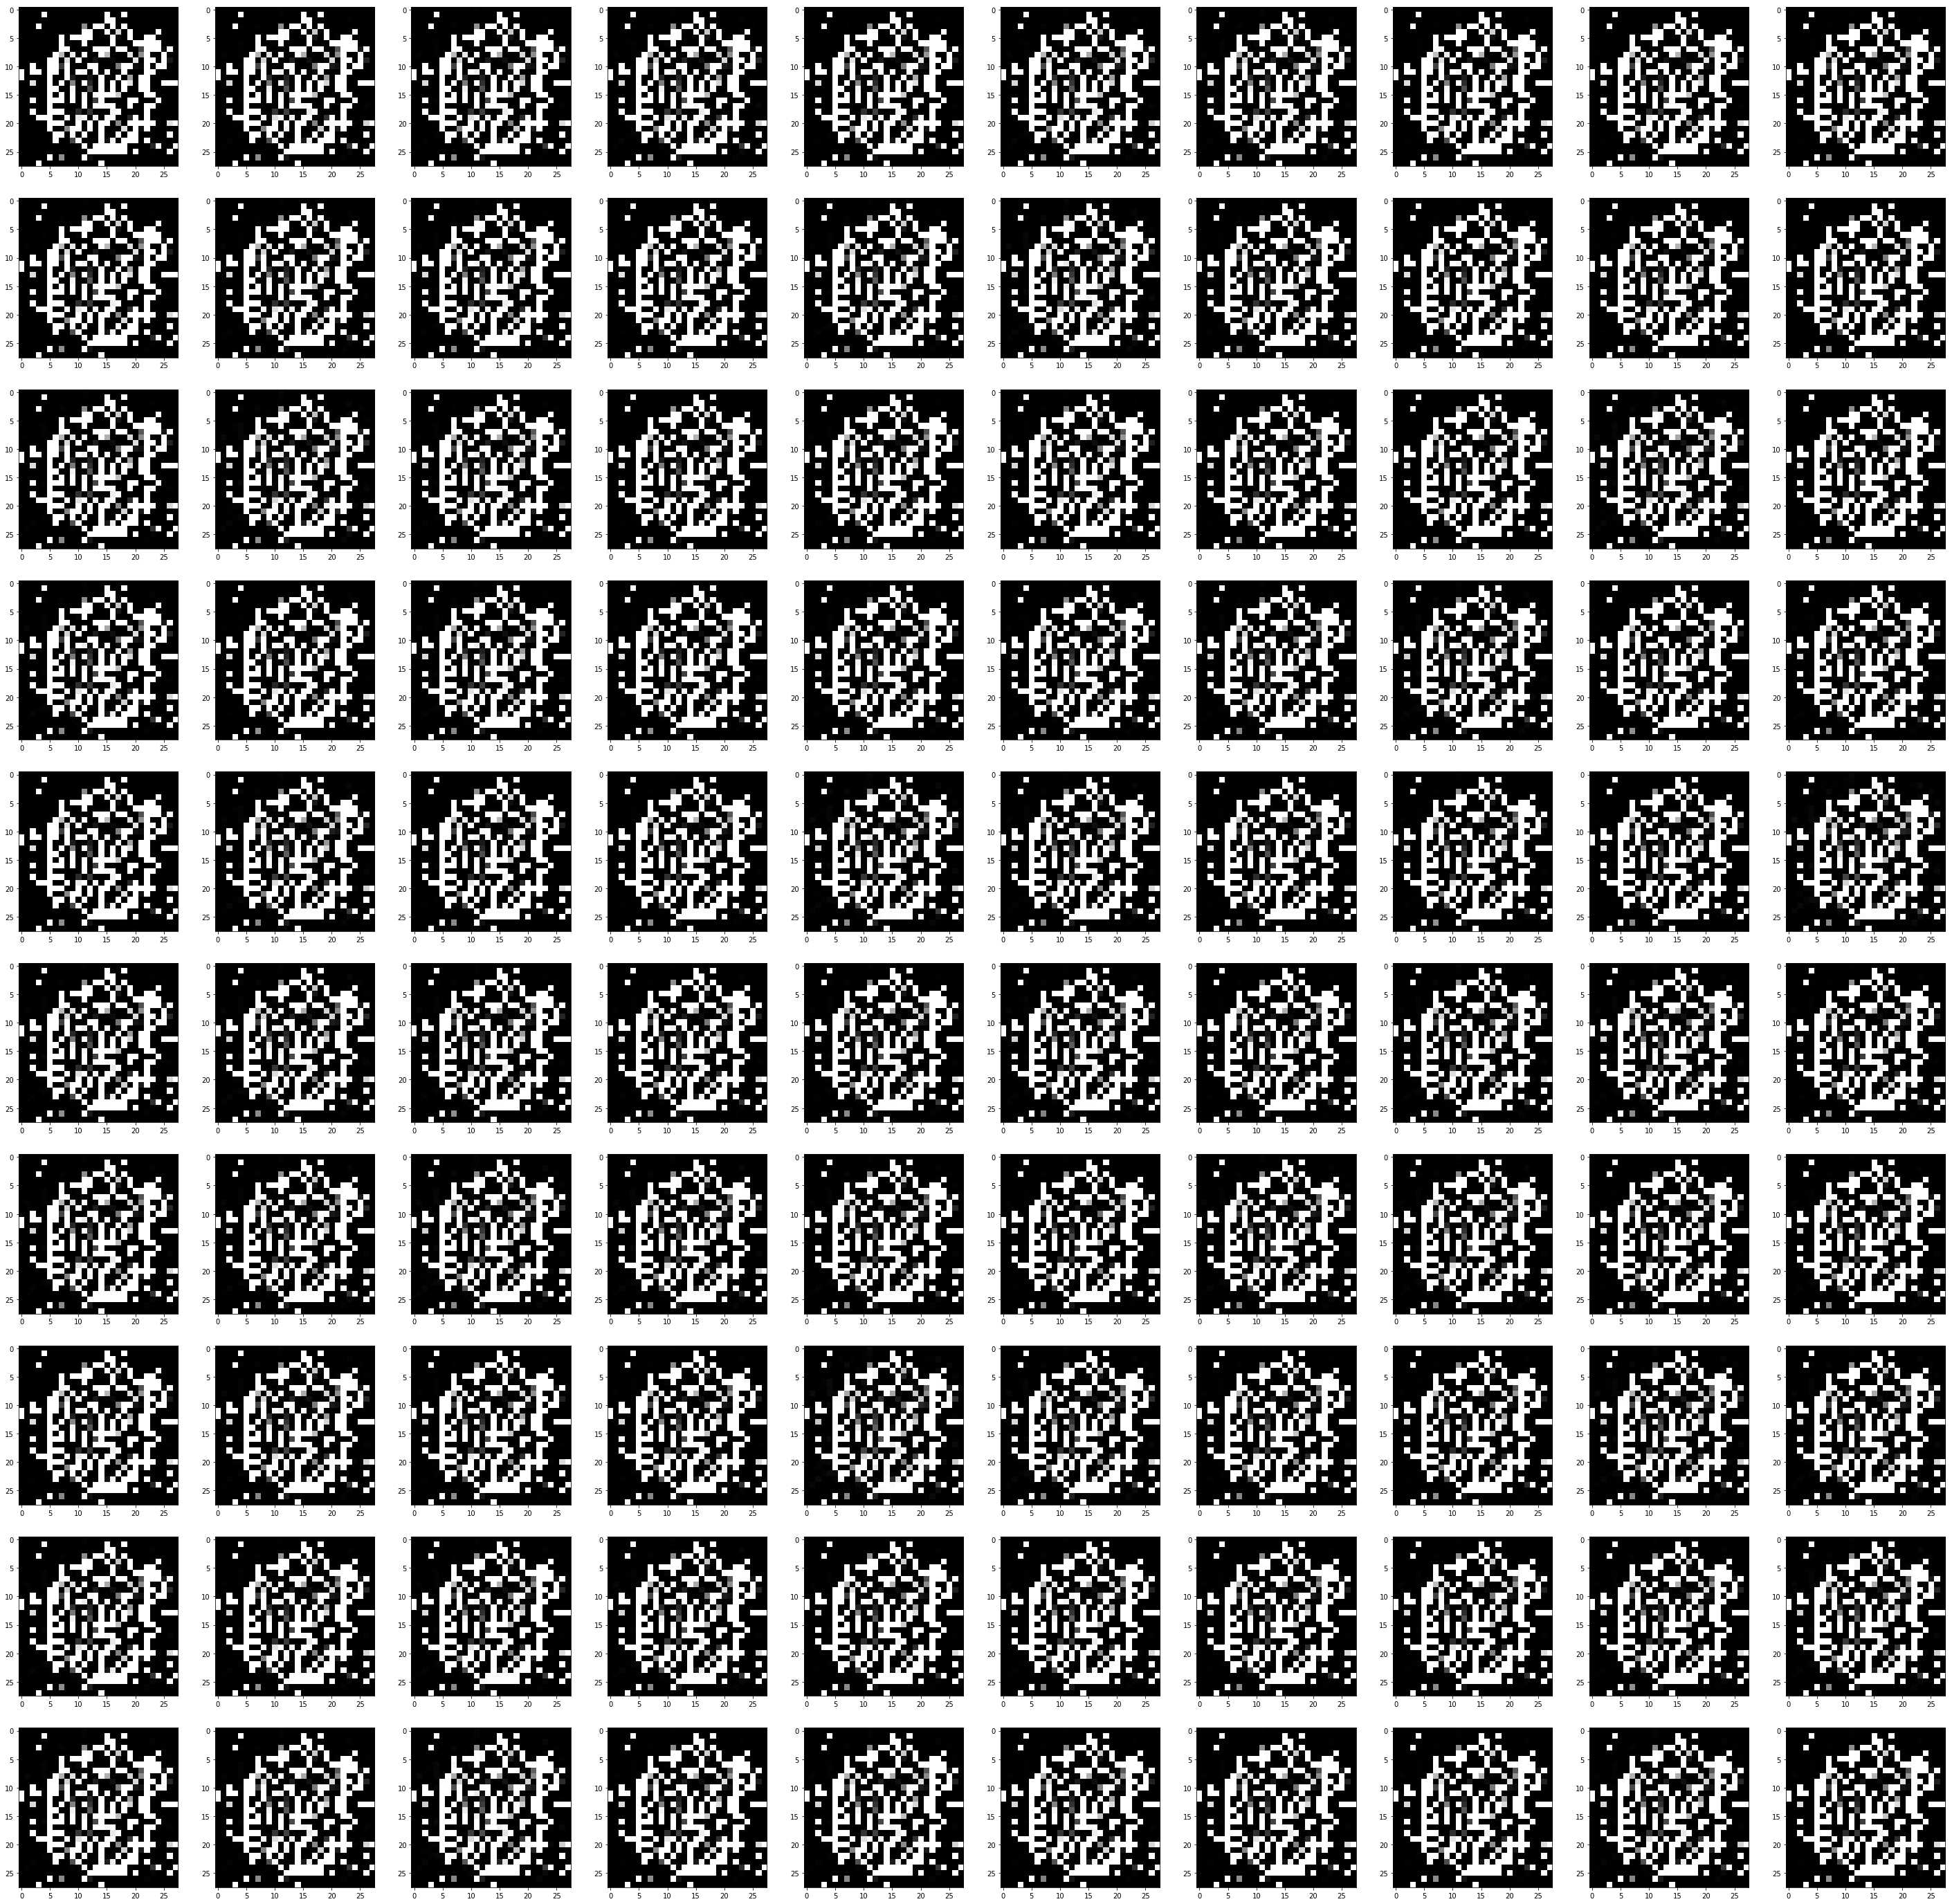

epoch: 2, batch: 57
epoch: 2, batch: 115
epoch: 2, batch: 173
epoch: 2, batch: 231
epoch: 2, batch: 289
epoch: 2, batch: 347
epoch: 2, batch: 405
epoch: 2, batch: 463


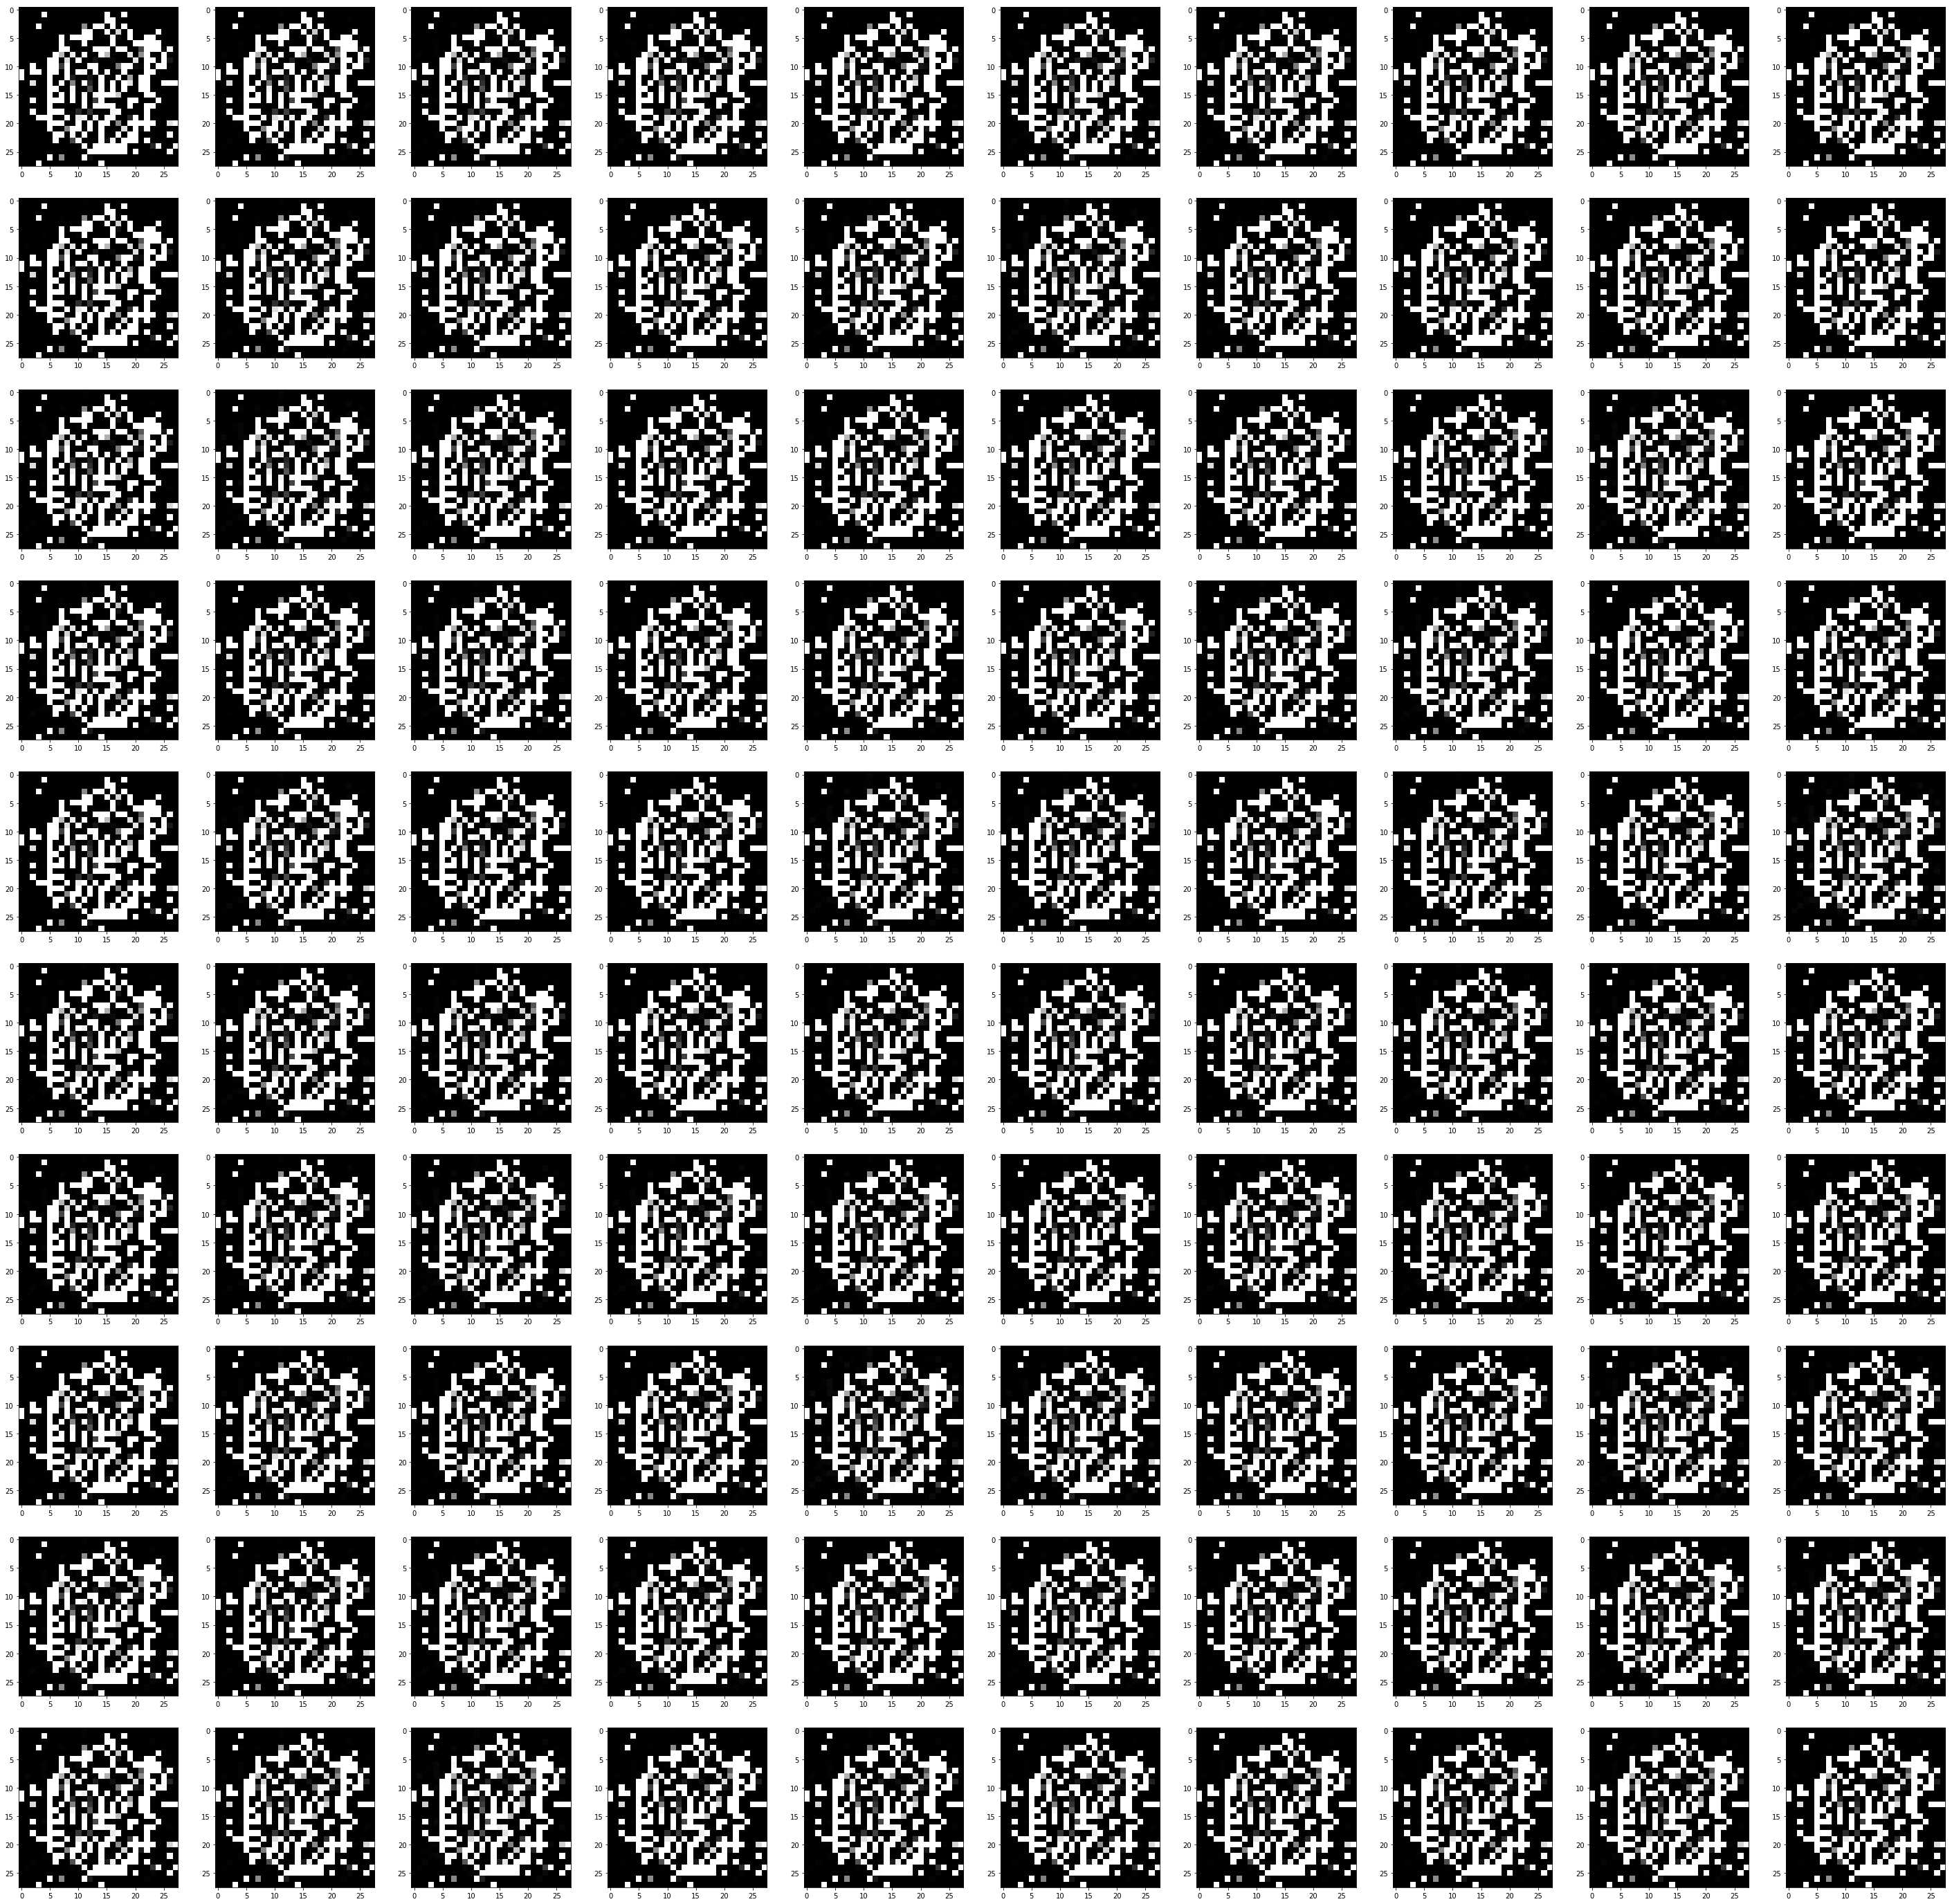

In [5]:
for epoch in range(3):
    for i, (x,_) in enumerate(train_loader):
        x = x.view(-1, 28 * 28)
        mini_batch = x.size()[0]
        y1 = torch.ones(mini_batch)
        y0 = torch.zeros(mini_batch)
        z1 = torch.randn((mini_batch, 100))
        z2 = torch.randn((mini_batch, 100))
        x,y0,y1,z1, z2 = Variable(x), Variable(y0), Variable(y1), Variable(z1), Variable(z2)
        #training Generator
        G_result = G(z1)
        D_prob = D(G_result)
        G_loss = BCE_loss(D_prob, y1)
        G_optimizer.zero_grad()
        G_loss.backward()
        G_optimizer.step()
        #training Discriminator
        D_result_real = D(x)
        D_result_fake = D(G(z2))
        D_loss_real = BCE_loss(D_result_real, y1)
        D_loss_fake = BCE_loss(D_result_fake, y0)
        D_loss = D_loss_real + D_loss_fake
        D_loss.backward()
        D_optimizer.step()
        
        visible = len(train_loader) // 8
        if i%visible == visible - 1:
            print("epoch: {}, batch: {}".format(epoch, i))
    noize_res = G(zz).data.view(100,28,28).numpy()/2 + 0.5

    plt.figure(figsize=(50,50))
    for j in range(10):
        for k in range(10):
            plt.subplot(10,10,j*10+k+1)
            plt.imshow(noize_res[j*10+k],cmap = 'gray')
    plt.show()    
            
        
